### 3-parameter exponential fitted $\beta$-scaling

Want to fit observable data as a function of $\beta$ to the form:
$$
\mathcal{O}(\beta) = \mathcal{O}_{\beta\to\infty} + C_1 e^{-C_2 \beta}
$$

where $\mathcal{O}_{\beta\to\infty}$,$C_1$, and $C_2$ are fitting parameters. The $\mathcal{O}_{\beta\to\infty}$ parameter will give a large $\beta$ extrapolation of the observable in question. Here, we will focus on the second Rényi entanglement entropy $S_2$.

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize
from IPython import display

Define the exponential model

In [102]:
def exponential(x, c1, c2, c3):
    return c1*np.exp(-x*c2) + c3

Feed data points (obtained from a separate script)

In [103]:
# Us = np.array([3.300000])

In [104]:
# Define data points
betas = np.array([4,6,8,12,16,24,32])
# betas = np.array([4,6,8,12,24])
num_betas = betas.size

In [105]:
# Array where extrapolated S2s will be saved to
extrapolated_S2s = np.zeros(num_betas)
extrapolated_S2s_err = np.zeros(num_betas)

In [106]:
L = 64
N = 64
D = 1
bin_size = 10000
U = 3.3

In [107]:
ℓs = np.arange(1,L//2+1)

In [108]:
s2ns = np.zeros((L//2,num_betas,N+1))
s2nsErr = np.zeros((L//2,num_betas,N+1))

In [109]:
# Initialize arrays that will store n-resolved s2s for every β and ℓ
s2ns_max = np.zeros((L//2,num_betas,N+1))
s2ns_max_minus_one = np.zeros((L//2,num_betas,N+1))
s2ns_max_plus_one = np.zeros((L//2,num_betas,N+1))

s2nsErr_max = np.zeros((L//2,num_betas,N+1))
s2nsErr_max_minus_one = np.zeros((L//2,num_betas,N+1))
s2nsErr_max_plus_one = np.zeros((L//2,num_betas,N+1))

In [110]:
n_maxs = np.zeros_like(ℓs,dtype=int) # n_max for each partition size. 

In [111]:
for ℓ in ℓs:

    # Find local particle number sector with maximum probability
    Pn = np.loadtxt("../ProcessedData/1D_"+str(L)+"_"+str(N)+"_"+str(ℓ)+"_3.300000_1.000000_betas_"+str(bin_size)+"_Pn.dat")[:,1:] # first column is β
    n_max = np.argmax(Pn[-1]) # Pn has same shape for all β. Can compute argmax for a fixed β values.
    n_maxs[ℓ-1] = n_max

    # Load s2n data for ℓ at various β values
    s2n = np.loadtxt("../ProcessedData/1D_"+str(L)+"_"+str(N)+"_"+str(ℓ)+"_3.300000_1.000000_betas_"+str(bin_size)+"_s2n.dat")[:,1:]
    s2nErr = np.loadtxt("../ProcessedData/1D_"+str(L)+"_"+str(N)+"_"+str(ℓ)+"_3.300000_1.000000_betas_"+str(bin_size)+"_s2nErr.dat")[:,1:]

    s2ns[ℓ-1] = s2n[:,:]
    s2nsErr[ℓ-1] = s2nErr[:,:]

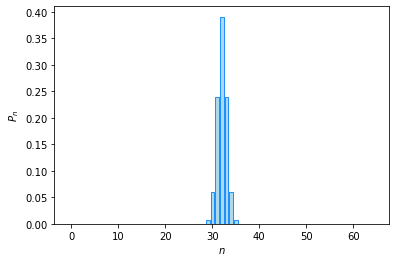

In [112]:
plt.bar(np.arange(N+1),Pn[-1],fc='lightblue',ec='dodgerblue')
plt.ylabel(r"$P_n$")
plt.xlabel(r"$n$")
plt.savefig("/Users/ecasiano/Desktop/Pn_ugly.pdf",dpi=300)

In [113]:
ℓ = L//2

In [114]:
s2nSecs_extrapolations = np.zeros(7,dtype=np.float64)
s2nSecsErr_extrapolations = np.zeros(7,dtype=np.float64)

0.2880+/-0.0351


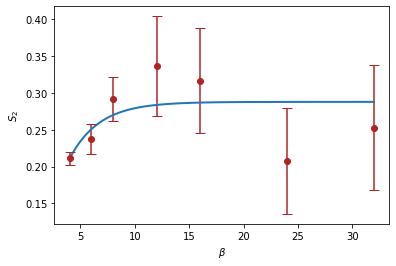

In [115]:
# n_max-3
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]-3]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]-3]
fit_start = 0
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[0] = c3
s2nSecsErr_extrapolations[0] = c3_err

0.3328+/-0.0056


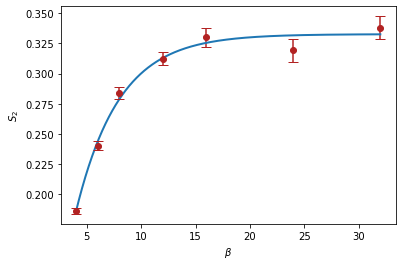

In [116]:
# n_max-2
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]-2]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]-2]
fit_start = 0
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[1] = c3
s2nSecsErr_extrapolations[1] = c3_err

0.3177+/-0.0011


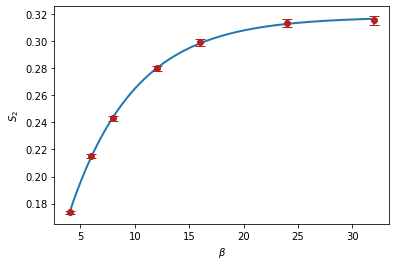

In [117]:
# n_max-1
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]-1]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]-1]
fit_start = 0
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[2] = c3
s2nSecsErr_extrapolations[2] = c3_err

0.2534+/-0.0015


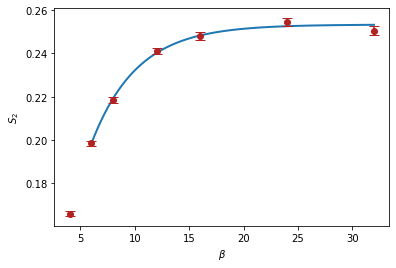

In [118]:
# n_max
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]]
fit_start = 1
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[3] = c3
s2nSecsErr_extrapolations[3] = c3_err

0.3167+/-0.0023


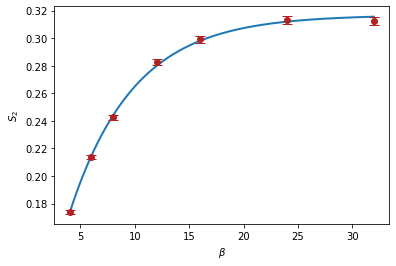

In [119]:
# n_max+1
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]+1]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]+1]
fit_start = 0
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[4] = c3
s2nSecsErr_extrapolations[4] = c3_err

0.3557+/-0.0170


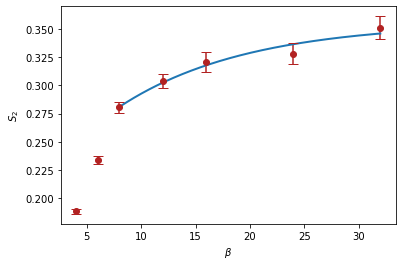

In [120]:
# n_max+2
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]+2]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]+2]
fit_start = 2
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[5] = c3
s2nSecsErr_extrapolations[5] = c3_err

0.3217+/-0.0242


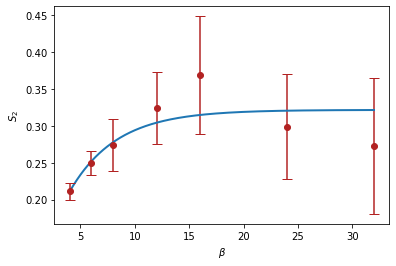

In [121]:
# n_max+3
U = 3.3
y_array_exp = s2ns[ℓ-1,:,n_maxs[ℓ-1]+3]
sigmas = s2nsErr[ℓ-1,:,n_maxs[ℓ-1]+3]
fit_start = 0
fit_stop = num_betas

# Perform 3-parameter exponential fit
popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential, betas[fit_start:fit_stop], y_array_exp[fit_start:fit_stop],sigma=sigmas[fit_start:fit_stop],
                                                             p0=[0.0,0.5,y_array_exp[-1]])


# Extract fit parameters
c1,c2,c3 = popt_exponential
c1_err,c2_err,c3_err = np.sqrt(np.diag(pcov_exponential))

# extrapolated_S2s[0] = c3
# extrapolated_S2s_err[0] = c3_err

# Perform the fit
betas_fit = np.linspace(betas[fit_start],betas[fit_stop-1],1000)
y_fit = exponential(betas_fit,c1,c2,c3)

plt.plot(betas_fit,y_fit,label='fit',lw=2)
plt.errorbar(betas,y_array_exp, yerr=sigmas,color='firebrick',marker='o',label='data',fmt='.',
            capsize=5)
plt.ylabel(r"$S_2$")
plt.xlabel(r"$\beta$")

# plt.annotate(r"$\ell=%d$"%(ℓ),(0.75,0.12),xycoords="axes fraction")

# plt.show()

print("%.4f+/-%.4f"%(c3,c3_err))

s2nSecs_extrapolations[6] = c3
s2nSecsErr_extrapolations[6] = c3_err

In [122]:
ns = np.arange(n_max-3,n_max+4)

In [123]:
# Save the extrapolations to file here
D=1
l_max=L//2
t=1.000000
beta_list = np.array(betas)
#Format the data file
with open("../ProcessedData/"+str(D)+"D_%d_%d_%d_%.6f_%.6f_extrapolations_%d_s2nSecs.dat"%(L,N,l_max,U,t,bin_size),"wb") as processed_data:
    np.savetxt(processed_data,np.c_[ns,s2nSecs_extrapolations,s2nSecsErr_extrapolations],delimiter=" ",fmt="%.16f",header="BH Parameters: L=%d,N=%d,D=%d,l=%d,t=%.6f,beta=extrapolations,bin_size=%d \n n               s2n               StdErr."%(L,N,D,l_max,t,bin_size))

In [124]:
# Plot
sectors_data = np.loadtxt("../ProcessedData/1D_"+str(L)+"_"+str(N)+"_"+str(l_max)+"_3.300000_1.000000_extrapolations_"+str(bin_size)+"_s2nSecs.dat")
ns = sectors_data[:,0]
s2n = sectors_data[:,1]
s2n_err = sectors_data[:,2]

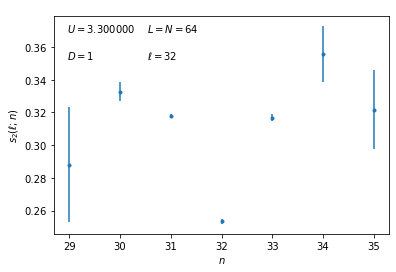

In [125]:
plt.errorbar(ns[0:],s2n[0:],yerr=s2n_err[0:],fmt='.')
plt.xlabel(r'$n$')
plt.ylabel(r'$s_2(\ell;n)$')
plt.annotate(r"$U=3.300000$",(0.17,0.8+0.08),xycoords='figure fraction',fontsize=10)
plt.annotate(r"$D=1$",(0.17,0.7+0.08),xycoords='figure fraction',fontsize=10)
plt.annotate(r"$L=N=%d$"%L,(0.37,0.8+0.08),xycoords='figure fraction',fontsize=10)
plt.annotate(r"$\ell=%d$"%l_max,(0.37,0.7+0.08),xycoords='figure fraction',fontsize=10)

# plt.annotate(r"$\ell=L/2$",(0.20,0.5),xycoords='figure fraction',fontsize=10);
# plt.savefig(r"s2acc_scaling.pdf",dpi=300)

plt.savefig("/Users/ecasiano/Desktop/s2n_vs_sectors_ugly.pdf",dpi=300)